## ProjF3 - Baseline Model

Use this document as a template to provide the evaluation of your baseline model. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [10]:
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install Pillow  # PIL is now part of Pillow
%pip install seaborn
%pip install tensorflow
%pip install keras



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


In [17]:
%pip install scikit-learn

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 5.1 MB/s eta 0:00:03
    --------------------------------------- 0.2/10.6 MB 2.9 MB/s eta 0:00:04
   - -------------------------------------- 0.4/10.6 MB 3.1 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/10.6 MB 3.3 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/10.6 MB 3.2 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/10.6 MB 3.0 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/10.6 MB 2.6 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/10.6 MB 2.6 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/10.6 MB 2.7 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/10.6 MB 2.8 MB/s eta 0:00:04
   -----


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import sklearn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image
import seaborn as sns

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools


from keras.optimizers import Adam

from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### 1. Load and Prepare Data

This should illustrate your code for loading the dataset and the split into training, validation and testing. You can add steps like pre-processing if needed.

In [2]:
df = pd.read_csv('./HAM10000_metadata.csv')
print(df)

df = df.sort_values('image_id', ascending=True)
df.head()

         lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]


lesion_id      image_id   dx    dx_type   age     sex     localization
4349  HAM_0000550  ISIC_0024306   nv  follow_up  45.0    male            trunk
4263  HAM_0003577  ISIC_0024307   nv  follow_up  50.0    male  lower extremity
4217  HAM_0001477  ISIC_0024308   nv  follow_up  55.0  female            trunk
3587  HAM_0000484  ISIC_0024309   nv  follow_up  40.0    male            trunk
1451  HAM_0003350  ISIC_0024310  mel      histo  60.0    male            chest

In [3]:
import os
import glob
base_skin_dir = os.path.join('./skin-mnist-images')


imageid_path_dict = {
    os.path.splitext(os.path.basename(x))[0]: x
    for x in glob.glob(os.path.join(base_skin_dir, 'HAM10000_images_part_*', '*.jpg'))  # Adjusted pattern
}
imageid_path_dict

{'ISIC_0024306': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024306.jpg',
 'ISIC_0024307': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024307.jpg',
 'ISIC_0024308': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024308.jpg',
 'ISIC_0024309': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024309.jpg',
 'ISIC_0024310': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024310.jpg',
 'ISIC_0024311': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024311.jpg',
 'ISIC_0024312': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024312.jpg',
 'ISIC_0024313': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024313.jpg',
 'ISIC_0024314': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024314.jpg',
 'ISIC_0024315': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024315.jpg',
 'ISIC_0024316': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024316.jpg',
 'ISIC_0024317': './skin-mnist-images\\HAM10000_images_part_1\\ISIC_0024317.jpg',
 'ISIC_0024318':

In [4]:
df['path'] = df['image_id'].map(imageid_path_dict)
df

lesion_id      image_id   dx    dx_type   age     sex  \
4349  HAM_0000550  ISIC_0024306   nv  follow_up  45.0    male   
4263  HAM_0003577  ISIC_0024307   nv  follow_up  50.0    male   
4217  HAM_0001477  ISIC_0024308   nv  follow_up  55.0  female   
3587  HAM_0000484  ISIC_0024309   nv  follow_up  40.0    male   
1451  HAM_0003350  ISIC_0024310  mel      histo  60.0    male   
...           ...           ...  ...        ...   ...     ...   
1721  HAM_0004304  ISIC_0034316  mel      histo  85.0    male   
1888  HAM_0006376  ISIC_0034317  mel      histo  70.0  female   
121   HAM_0000344  ISIC_0034318  bkl      histo  55.0    male   
7440  HAM_0000747  ISIC_0034319   nv      histo  30.0    male   
7363  HAM_0002244  ISIC_0034320   nv      histo  25.0  female   

         localization                                               path  
4349            trunk  ./skin-mnist-images\HAM10000_images_part_1\ISI...  
4263  lower extremity  ./skin-mnist-images\HAM10000_images_part_1\ISI...  
4217            trunk  ./skin-mnist-images\HAM10000_images_part_1\ISI...  
3587            trunk  ./skin-mnist-images\HAM10000_images_part_1\ISI...  
1451            chest  ./skin-mnist-images\HAM10000_images_part_1\ISI...  
...               ...                                                ...  
1721  upper extremity  ./skin-mnist-images\HAM10000_images_part_2\ISI...  
1888  lower extremity  ./skin-mnist-images\HAM10000_images_part_2\ISI...  
121             trunk  ./skin-mnist-images\HAM10000_images_part_2\ISI...  
7440            trunk  ./skin-mnist-images\HAM10000_images_part_2\ISI...  
7363            chest  ./skin-mnist-images\HAM10000_images_part_2\ISI...  

[10015 rows x 8 columns]

In [49]:
#Lesion Dictionary created for ease
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

df['lesionType'] = df['dx'].map(lesion_type_dict.get) 

df['lesionTypeIndex'] = pd.Categorical(df['lesionType']).codes

df.head()

lesion_id      image_id   dx    dx_type   age     sex  \
4349  HAM_0000550  ISIC_0024306   nv  follow_up  45.0    male   
4263  HAM_0003577  ISIC_0024307   nv  follow_up  50.0    male   
4217  HAM_0001477  ISIC_0024308   nv  follow_up  55.0  female   
3587  HAM_0000484  ISIC_0024309   nv  follow_up  40.0    male   
1451  HAM_0003350  ISIC_0024310  mel      histo  60.0    male   

         localization                                               path  \
4349            trunk  ./skin-mnist-images\HAM10000_images_part_1\ISI...   
4263  lower extremity  ./skin-mnist-images\HAM10000_images_part_1\ISI...   
4217            trunk  ./skin-mnist-images\HAM10000_images_part_1\ISI...   
3587            trunk  ./skin-mnist-images\HAM10000_images_part_1\ISI...   
1451            chest  ./skin-mnist-images\HAM10000_images_part_1\ISI...   

           lesion_type  lesion_type_idx  \
4349  Melanocytic nevi                4   
4263  Melanocytic nevi                4   
4217  Melanocytic nevi                4   
3587  Melanocytic nevi                4   
1451          Melanoma                5   

                                                  image        lesionType  \
4349  [[[226, 130, 129], [228, 131, 134], [230, 132,...  Melanocytic nevi   
4263  [[[215, 123, 133], [217, 123, 135], [218, 121,...  Melanocytic nevi   
4217  [[[246, 172, 181], [246, 174, 182], [245, 171,...  Melanocytic nevi   
3587  [[[206, 117, 133], [206, 121, 134], [209, 122,...  Melanocytic nevi   
1451  [[[71, 33, 38], [72, 32, 38], [71, 32, 38], [6...          Melanoma   

      lesionTypeIndex  
4349                4  
4263                4  
4217                4  
3587                4  
1451                5

In [7]:
np.asarray(Image.open(df['path'][1])).shape

(450, 600, 3)

In [8]:
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((200,150))))


In [9]:
# Check the size of all images in dataset:
df['image'].map(lambda x: x.shape).value_counts()


image
(150, 200, 3)    10015
Name: count, dtype: int64

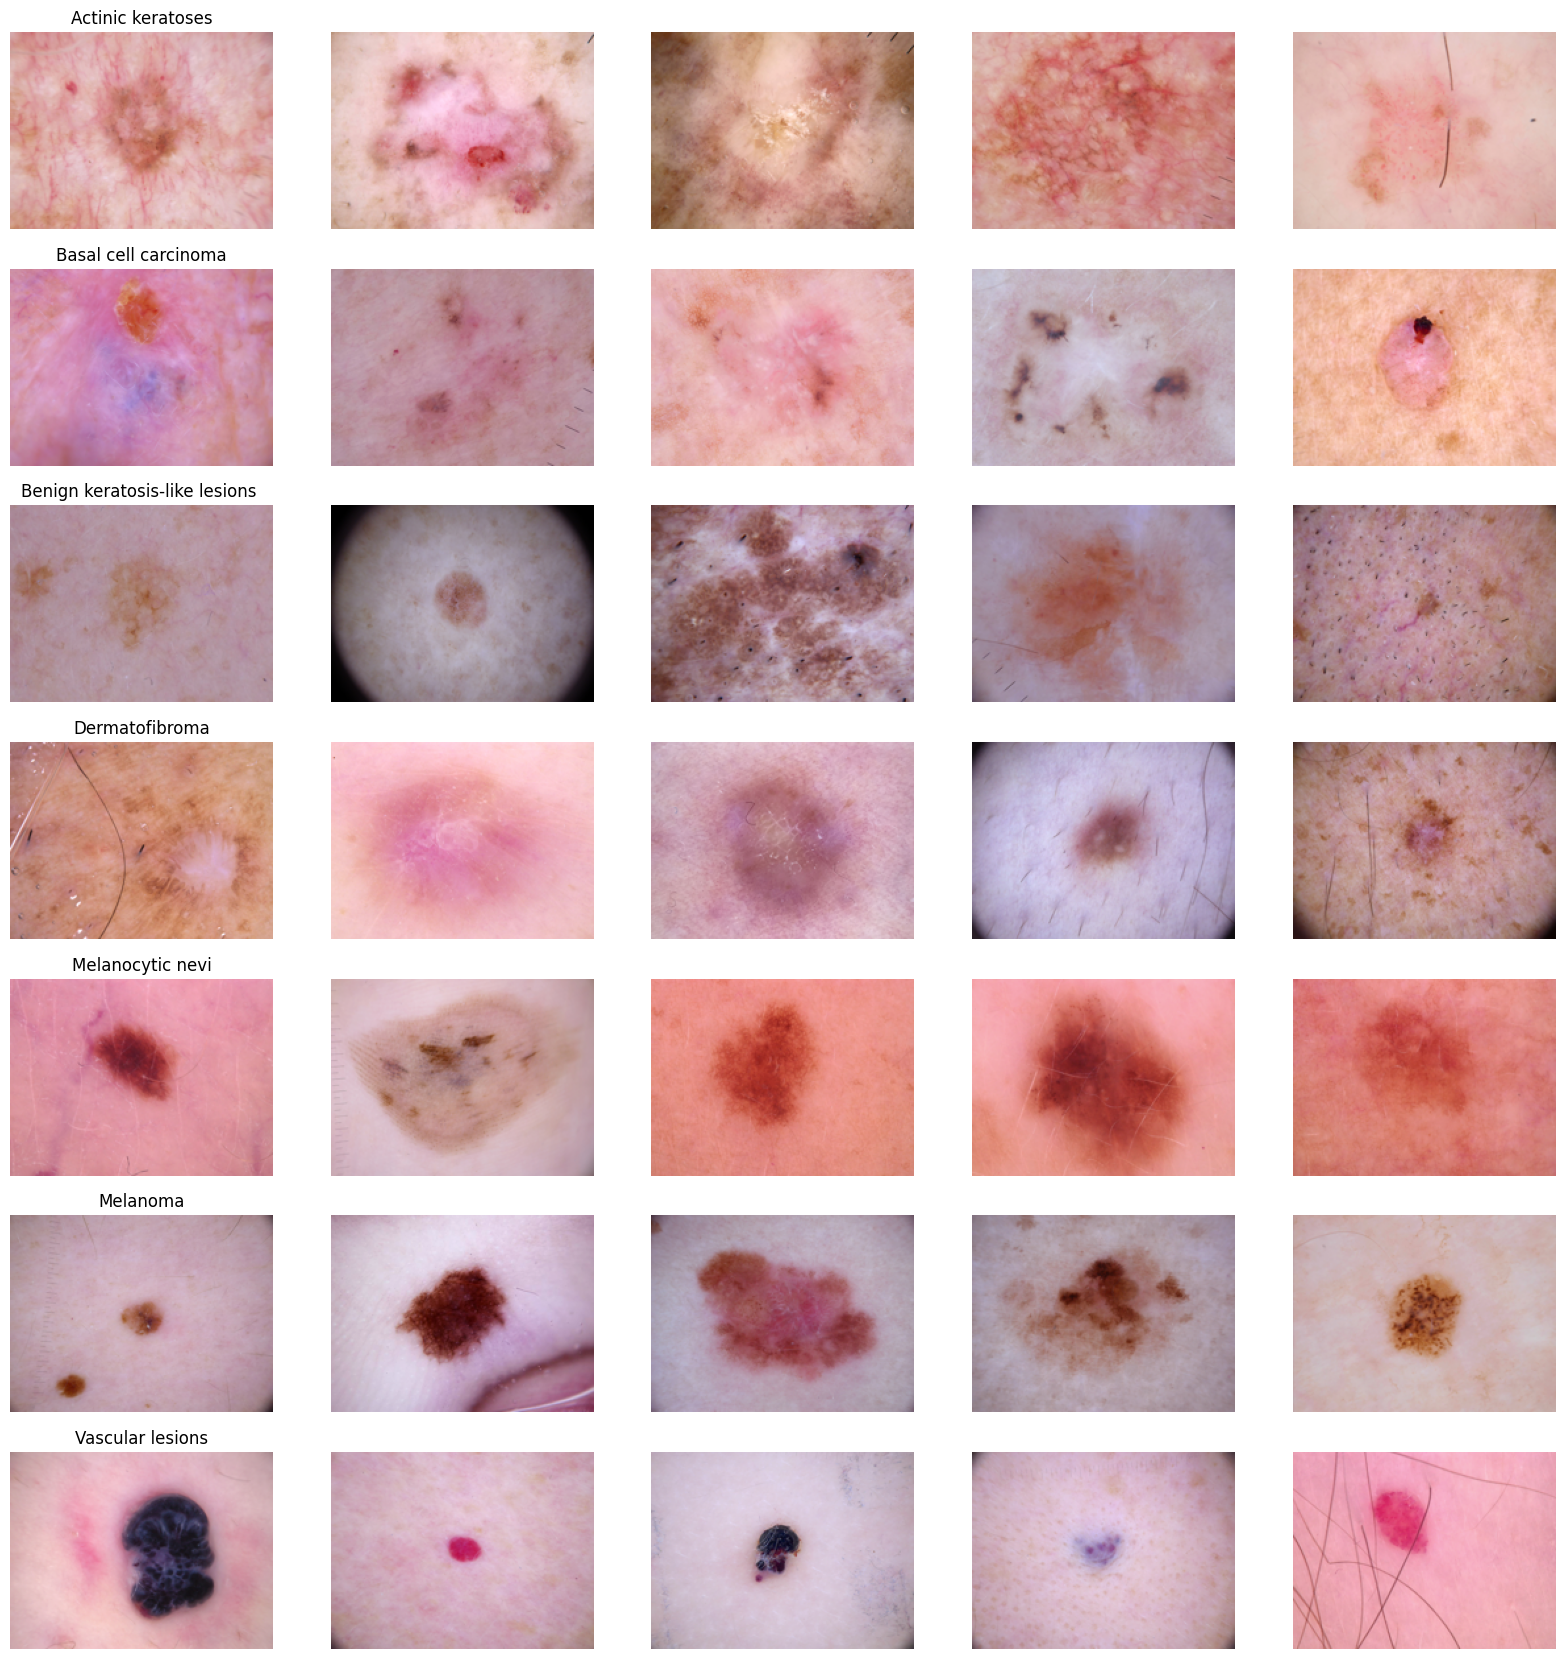

In [10]:
# Show some images from the dataset:
numCols = 5
numRows = 7
# subplot of 7 rows and 5 columns images:
fig, mAxs = plt.subplots(numRows, numCols, figsize = (4*numCols, 3*numRows))
for nAxs, (className, rowTypes) in zip(mAxs, 
                                         df.sort_values(['lesion_type']).groupby('lesion_type')):
    nAxs[0].set_title(className)
    for c_ax, (_, cRow) in zip(nAxs, rowTypes.sample(numCols, random_state=5420).iterrows()):
        c_ax.imshow(cRow['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

In [11]:
# Input Features X:
inputFeatures = df.drop(columns=['lesion_type_idx'],axis=1)
# Output -> Classes (different types of cancers)
outputTarget = df['lesion_type_idx']

In [37]:
from tensorflow.keras.utils import to_categorical
# Split data in train and test data: 90% train & validation - 10% test
xTrainDF, xTestDF, yTrainDF, yTestDF = train_test_split(inputFeatures, outputTarget, test_size=0.1, random_state=5420, shuffle=True)
# Get images information from dataset:
xTrain = np.asarray(xTrainDF['image'].tolist())
xTest = np.asarray(xTestDF['image'].tolist())

# Standardize the train and test data:
# mean train data
xTrainMean = np.mean(xTrain)
# standard deviation of train data
xTrainStd = np.std(xTrain)

# mean test data
xTestMean = np.mean(xTest)
# standard deviation of test data
xTestStd = np.std(xTest)

# xTrainNN ~ N(0,1)
xTrain = (xTrain - xTrainMean)/xTrainStd
# xTestNN ~ N(0,1)
xTest = (xTest - xTestMean)/xTestStd
# Use dummy variable for classes (one-hot encoding):
yTrain = to_categorical(yTrainDF, num_classes = 7)
yTest = to_categorical(yTestDF, num_classes = 7)
yTestNN = yTest

In [38]:
# train-validation-test split:
xTrainCnn, xValidateCnn, yTrainCnn, yValidateCnn = train_test_split(xTrain, yTrain, test_size = 0.1, random_state = 542)
# Reshape image in 3 dimensions (height = 150, width = 200 , canal = 3)
xTrainCnn = xTrainCnn.reshape(xTrainCnn.shape[0], *(150, 200, 3))
xTestCnn = xTest.reshape(xTest.shape[0], *(150, 200, 3))
xValidateCnn = xValidateCnn.reshape(xValidateCnn.shape[0], *(150, 200, 3))

In [39]:
# With data augmentation to prevent overfitting 
imageGenerator = ImageDataGenerator(
        width_shift_range=0.11,  # Randomly shift images horizontally
        height_shift_range=0.11,  # Randomly shift images vertically
        rotation_range=25,  # Randomly rotate images
        zoom_range = 0.15, # Randomly zoom image 
        horizontal_flip=True,  # Randomly flip images horizontaly
        vertical_flip=True)  # Randomly flip images verticaly

imageGenerator.fit(xTrainCnn)

In [42]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
import keras.backend as K
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
# CNN model: 
input_shape = (150, 200, 3)
num_classes = 7

model = Sequential()
model.add(Conv2D(input_shape = input_shape, filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'Same'))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.16))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'Same'))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'Same'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(units = num_classes, activation='softmax'))
model.summary()

c:\Users\Soha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 200, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 100, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 100, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 75, 100, 32)    │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 75, 100, 32)    │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 37, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 37, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 37, 50, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     7,373,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,490,919 (28.58 MB)

 Trainable params: 7,490,919 (28.58 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
from keras.callbacks import EarlyStopping
# Eraly stoping by valdiation accuracy:
early = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, patience = 10, verbose = 1, mode = 'auto')
# Adam optimizer
optimizer = Adam(learning_rate = 0.001)
# Reduce learning rate during training process:
reduceLearningRate = ReduceLROnPlateau(monitor = 'val_loss', 
                                            patience = 5, 
                                            verbose = 1, 
                                            factor = 0.25, 
                                            min_lr = 0.0001)

# compile the model: loss function is crossentropy
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [45]:
# Fit the model:
epochs = 60
batch_size = 16
# Fit the model on training data:
history = model.fit(imageGenerator.flow(xTrainCnn,yTrainCnn, batch_size=batch_size),
                              epochs = epochs, validation_data = (xValidateCnn, yValidateCnn),
                              verbose = 1, steps_per_epoch=xTrainCnn.shape[0] // batch_size
                              , callbacks=[reduceLearningRate, early])

from tensorflow.keras.metrics import Recall 
from sklearn.metrics import classification_report,confusion_matrix

Epoch 1/60


c:\Users\Soha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


506/506 ━━━━━━━━━━━━━━━━━━━━ 275s 530ms/step - accuracy: 0.6524 - loss: 1.1122 - val_accuracy: 0.6774 - val_loss: 1.0387 - learning_rate: 0.0010
Epoch 2/60
  1/506 ━━━━━━━━━━━━━━━━━━━━ 4:01 478ms/step - accuracy: 0.5000 - loss: 1.3316

c:\Users\Soha\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


506/506 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5000 - loss: 0.6671 - val_accuracy: 0.6785 - val_loss: 1.0833 - learning_rate: 0.0010
Epoch 3/60
506/506 ━━━━━━━━━━━━━━━━━━━━ 257s 506ms/step - accuracy: 0.6630 - loss: 1.0320 - val_accuracy: 0.6807 - val_loss: 0.8951 - learning_rate: 0.0010
Epoch 4/60
506/506 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5625 - loss: 0.5853 - val_accuracy: 0.6840 - val_loss: 0.8848 - learning_rate: 0.0010
Epoch 5/60
506/506 ━━━━━━━━━━━━━━━━━━━━ 267s 526ms/step - accuracy: 0.6832 - loss: 0.8927 - val_accuracy: 0.7018 - val_loss: 0.8151 - learning_rate: 0.0010
Epoch 6/60
506/506 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6875 - loss: 0.5566 - val_accuracy: 0.7051 - val_loss: 0.8031 - learning_rate: 0.0010
Epoch 7/60
506/506 ━━━━━━━━━━━━━━━━━━━━ 252s 496ms/step - accuracy: 0.6754 - loss: 0.8960 - val_accuracy: 0.7162 - val_loss: 0.7836 - learning_rate: 0.0010
Epoch 8/60
506/506 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5000 - loss: 0.5103 -

In [46]:
# Test data loss and accuracy:
loss, accuracy = model.evaluate(xTestCnn, yTest, verbose=1)
# Validation data loss and accuracy:
loss_v, accuracy_v = model.evaluate(xValidateCnn, yValidateCnn, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
# Save the model:
model.save("model.h5")

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.7726 - loss: 0.6628
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.7367 - loss: 0.7192


Validation: accuracy = 0.741685  ;  loss_v = 0.680936
Test: accuracy = 0.771457  ;  loss = 0.667956


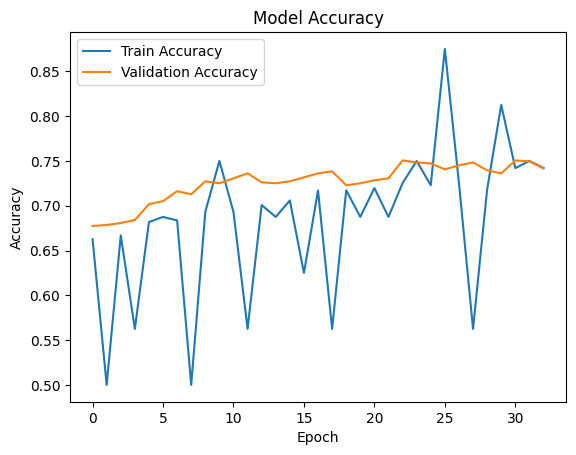

In [47]:
# Plot train and validation accuracy over iterations:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train Accuracy","Validation Accuracy"])
plt.show()

In [17]:
# Adjusting the image size
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((75,100))))
df.head()

lesion_id      image_id   dx    dx_type   age     sex  \
4349  HAM_0000550  ISIC_0024306   nv  follow_up  45.0    male   
4263  HAM_0003577  ISIC_0024307   nv  follow_up  50.0    male   
4217  HAM_0001477  ISIC_0024308   nv  follow_up  55.0  female   
3587  HAM_0000484  ISIC_0024309   nv  follow_up  40.0    male   
1451  HAM_0003350  ISIC_0024310  mel      histo  60.0    male   

         localization                                               path  \
4349            trunk  ./skin-mnist-images\HAM10000_images_part_1\ISI...   
4263  lower extremity  ./skin-mnist-images\HAM10000_images_part_1\ISI...   
4217            trunk  ./skin-mnist-images\HAM10000_images_part_1\ISI...   
3587            trunk  ./skin-mnist-images\HAM10000_images_part_1\ISI...   
1451            chest  ./skin-mnist-images\HAM10000_images_part_1\ISI...   

             cell_type  cell_type_idx  \
4349  Melanocytic nevi              4   
4263  Melanocytic nevi              4   
4217  Melanocytic nevi              4   
3587  Melanocytic nevi              4   
1451          Melanoma              5   

                                                  image  
4349  [[[228, 131, 134], [230, 128, 136], [230, 124,...  
4263  [[[217, 121, 134], [218, 124, 139], [217, 123,...  
4217  [[[246, 172, 180], [246, 171, 176], [247, 173,...  
3587  [[[207, 119, 134], [210, 120, 136], [209, 117,...  
1451  [[[71, 33, 38], [69, 32, 38], [67, 29, 35], [6...

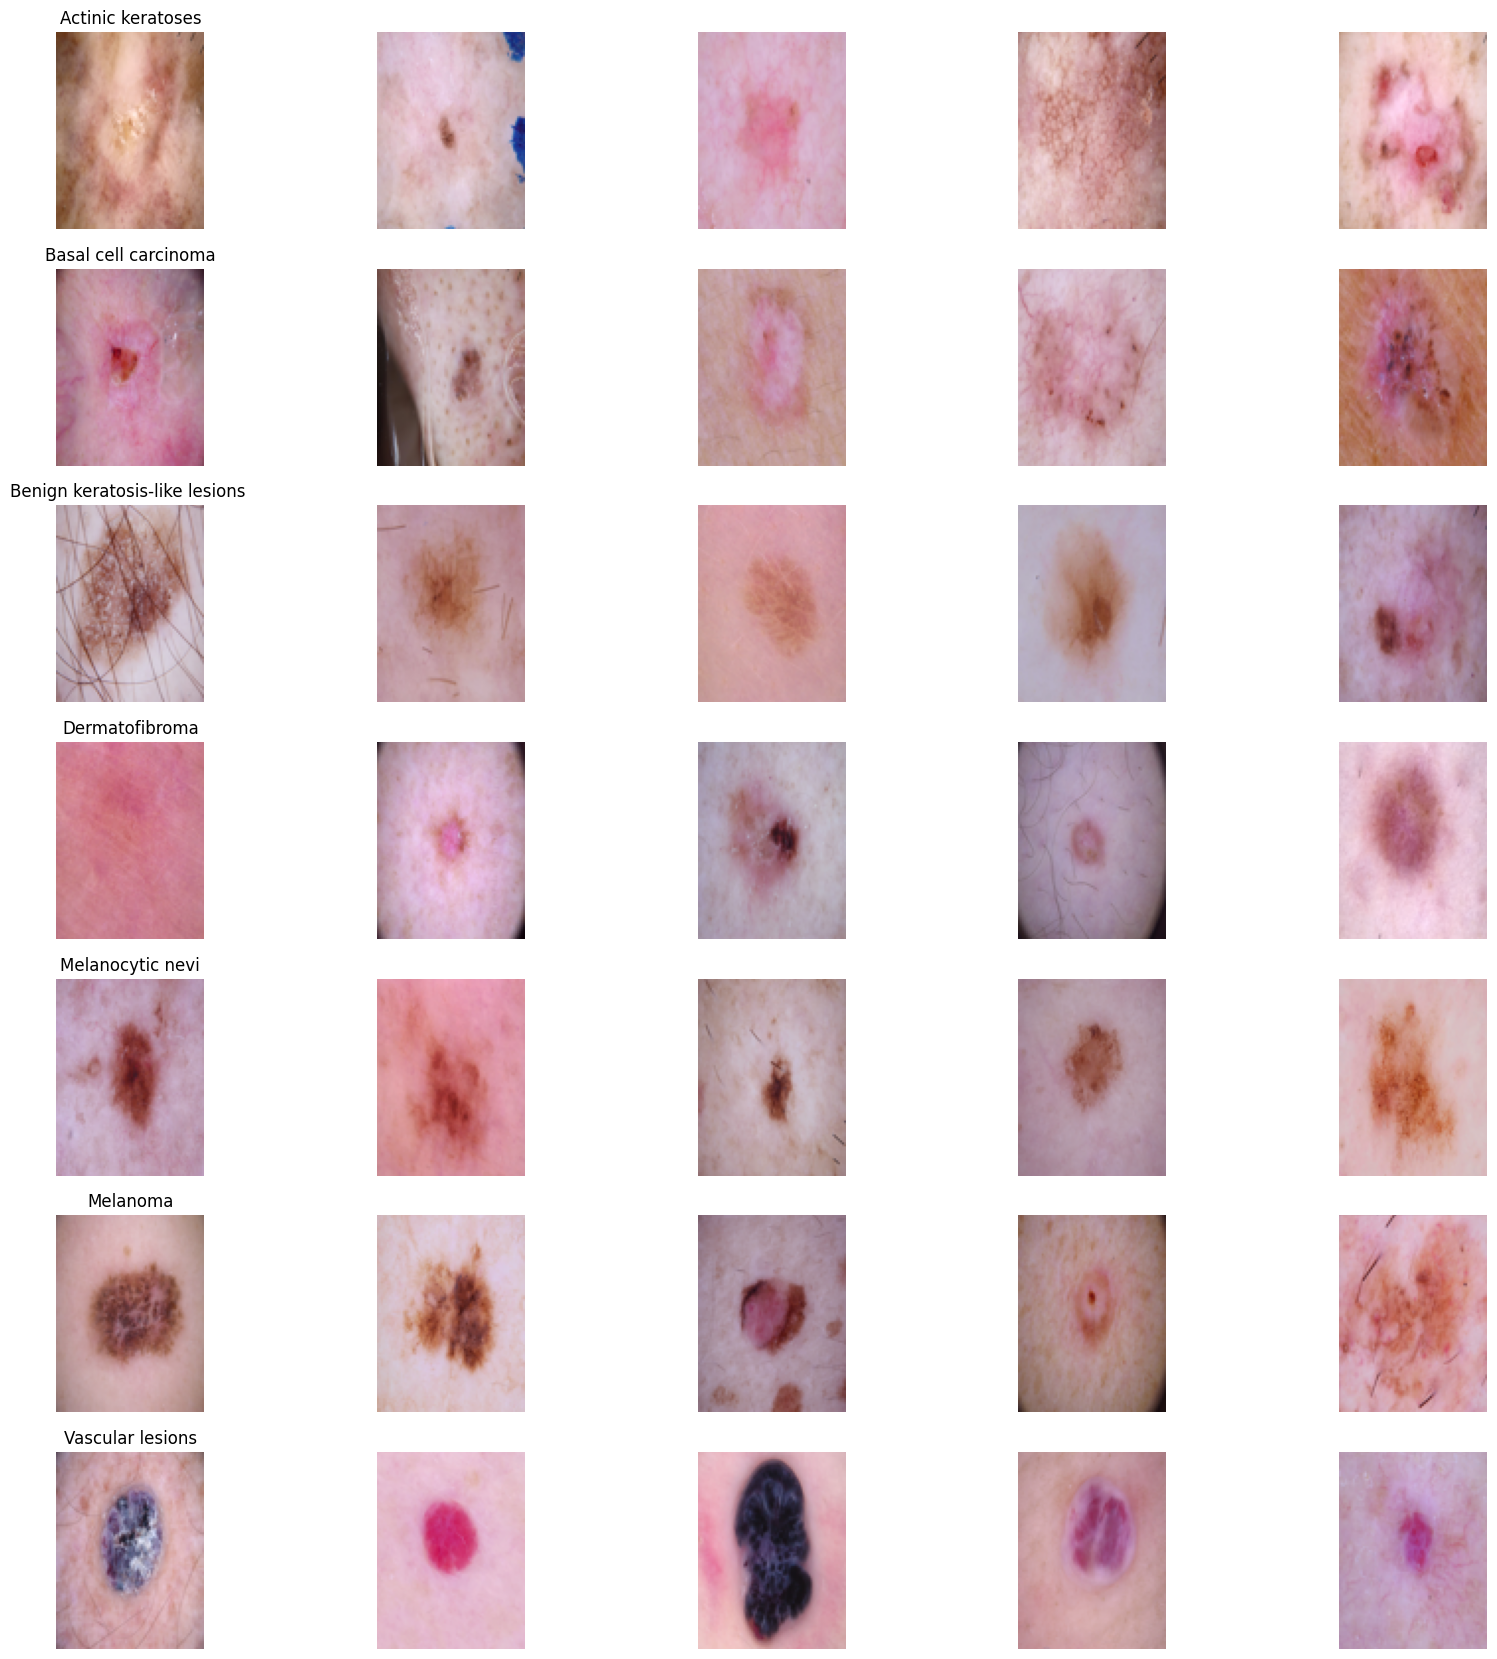

In [18]:
# Visualize the images
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

In [36]:
features=df.drop(columns=['cell_type_idx'],axis=1)
target=df['cell_type_idx']

KeyError: "['cell_type_idx'] not found in axis"

In [35]:
xTrainDF, xTestDF, yTrainDF, yTestDF = train_test_split(features, target, test_size=0.1, random_state=5420, shuffle=True)

NameError: name 'features' is not defined

In [22]:
# Get images information from dataset:
xTrain = np.asarray(xTrainDF['image'].tolist())
xTest = np.asarray(xTestDF['image'].tolist())


In [ ]:
# train-validation-test split:
xTrainCnn, xValidateCnn, yTrainCnn, yValidateCnn = train_test_split(xTrain, yTrain, test_size = 0.1, random_state = 542)
# Reshape image in 3 dimensions (height = 150, width = 200 , canal = 3)
xTrainCnn = xTrainCnn.reshape(xTrainCnn.shape[0], *(150, 200, 3))
xTestCnn = xTest.reshape(xTest.shape[0], *(150, 200, 3))
xValidateCnn = xValidateCnn.reshape(xValidateCnn.shape[0], *(150, 200, 3))

In [26]:
from tensorflow.keras.utils import to_categorical

# Standardize the train and test data:
# mean train data
xTrainMean = np.mean(xTrain)
# standard deviation of train data
xTrainStd = np.std(xTrain)

# mean test data
xTestMean = np.mean(xTest)
# standard deviation of test data
xTestStd = np.std(xTest)

# xTrainNN ~ N(0,1)
xTrain = (xTrain - xTrainMean)/xTrainStd
# xTestNN ~ N(0,1)
xTest = (xTest - xTestMean)/xTestStd
# Use dummy variable for classes (one-hot encoding):
yTrain = to_categorical(yTrainDF, num_classes = 7)
yTest = to_categorical(yTestDF, num_classes = 7)
yTestNN = yTest

In [17]:
expected_elements = 8111 * 150 * 200 * 3
print("Expected number of elements:", expected_elements)


Expected number of elements: 729990000


In [18]:
print(xTrainCnn.size)

729990000


In [16]:
print("Original shape of xTrainCnn:", xTrainCnn.shape[0])


Original shape of xTrainCnn: 8111


In [19]:
# train-validation-test split:
xTrainCnn, xValidateCnn, yTrainCnn, yValidateCnn = train_test_split(xTrain, yTrain, test_size = 0.1, random_state = 542)
# Reshape image in 3 dimensions (height = 150, width = 200 , canal = 3)
print(xTrainCnn.size)
xTrainCnn = xTrainCnn.reshape(xTrainCnn.shape[0], *(150, 200, 3))
xTestCnn = xTest.reshape(xTest.shape[0], *(150, 200, 3))
xValidateCnn = xValidateCnn.reshape(xValidateCnn.shape[0], *(150, 200, 3))

729990000


In [34]:
expected_elements = 9013* 224* 224* 3
print("Expected number of elements:", expected_elements)

Expected number of elements: 1356708864


In [25]:
np.asarray(xTrainDF['image'].tolist()).size

811170000

In [33]:
xTrain.shape[0]


9013

In [32]:
# See ImageDataGenrator results: 
print(np.asarray(xTrainDF['image'].tolist()).size)
k = np.asarray(xTrainDF['image'].tolist()).reshape(xTrain.shape[0], 224, 224, 3)

train_generator = imageGenerator.flow(k, batch_size=1)
rows = 5
columns = 4
fig, axes = plt.subplots(rows,columns)
for r in range(rows):
    for c in range(columns):
        image_batch = train_generator.next()
        image = image_batch[0].astype('uint8')
        axes[r,c].imshow(image)
fig.set_size_inches(15,10)

811170000


ValueError: cannot reshape array of size 811170000 into shape (9013,224,224,3)

In [20]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.25,random_state=1234)

In [21]:
# Normalizing the x_train, x_test by substracting them from their mean values and then dividing by their standard deviation.
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [22]:
from tensorflow.keras.utils import to_categorical


# Perform one-hot encoding on the labels
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)

In [23]:
# I choosed to split the train set in two parts : a small fraction (10%) became the validation set which the model is evaluated and the rest (90%) is used to train the model
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)

In [24]:
import tensorflow as tf

input_shape = x_validate[0,:,:,:].shape
model_input = tf.keras.Input(shape=input_shape)
# Reshape image in 3 dimensions (height = 75px, width = 100px , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(75, 100, 3))
x_test = x_test.reshape(x_test.shape[0], *(75, 100, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(75, 100, 3))

In [37]:
#Data Augmentation
dataaugment = ImageDataGenerator(
        #featurewise_center=False,  # set input mean to 0 over the dataset
        #samplewise_center=False,  # set each sample mean to 0
        #featurewise_std_normalization=False,  # divide inputs by std of the dataset
        #samplewise_std_normalization=False,  # divide each input by its std
        #zca_whitening=False,  # apply ZCA whitening
        #rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
        #zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        #vertical_flip=True,  # randomly flip images
        #shear_range = 10
        ) 




In [34]:
print("x_train shape:", x_train.shape)
print("x_train dtype:", x_train.dtype)


x_train shape: (6759, 75, 100, 3)
x_train dtype: float64


### 2. Prepare your Baseline Model

Here you can have your code to either train (e.g., if you are building it from scratch) or load (e.g., in the case that you are loading a pre-trained model) your model. These steps may require you to use other packages or python files. You can just call them here. You don't have to include them in your submission. Remember that we will be looking at the saved outputs in the notebooked and we will not run the entire notebook.

In [26]:
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

#Model Parameters
input_shape = (75, 100, 3)
num_classes = 7

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

epochs = 100   # formulae for epochs -> input size//batch size
batch_size = 32       # taking in power of 2

from keras.callbacks import EarlyStopping
#Callbacks
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=0, factor=0.5, min_lr=0.00001)
early_stopping_monitor = EarlyStopping(patience=20,monitor='val_accuracy')

c:\Users\Soha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [27]:
def hist(model):
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
    history = model.fit(dataaugment.flow(x_train,y_train, batch_size=batch_size),
                        epochs = epochs, validation_data = (x_validate,y_validate),
                        verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size, 
                        callbacks=[learning_rate_reduction,early_stopping_monitor])

    loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
    predictions = model.predict(x_test)
    loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=2)
    loss_t, accuracy_t = model.evaluate(x_train, y_train, verbose=2)
    return (predictions,accuracy_t,accuracy_v,accuracy)

In [28]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
import keras.backend as K
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

import math
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(BatchNormalization())
##############################
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
##############################
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
##############################
model.add(Flatten())

model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Output
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

c:\Users\Soha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 75, 100, 32)    │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 75, 100, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 75, 100, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 75, 100, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 37, 50, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 37, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 37, 50, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 37, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 37, 50, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 37, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 18, 25, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 18, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 18, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 18, 25, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_6             │ (None, 9, 12, 64)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 9, 12, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 9, 12, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 9, 12, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 9, 12, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 9, 12, 64)      │           256 │
│ (BatchNormalization)            │                        │             

 Total params: 409,991 (1.56 MB)

 Trainable params: 405,831 (1.55 MB)

 Non-trainable params: 4,160 (16.25 KB)

In [49]:
from tensorflow.keras.optimizers import Adam, SGD
# Define the optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
# Set a learning rate annealer
# applying callbacks
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
early_stopping_monitor = EarlyStopping(patience=20,monitor='val_accuracy')

c:\Users\Soha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [53]:
data_gen = dataaugment.flow(x_train, y_train, batch_size=batch_size)
batch_x, batch_y = next(data_gen)
print(batch_x.shape, batch_y.shape)


(32, 75, 100, 3) (32, 7)


In [31]:
print("x_train contains None:", None in x_train)
print("y_train contains None:", None in y_train)
print("x_validate contains None:", None in x_validate)
print("y_validate contains None:", None in y_validate)


x_train contains None: False
y_train contains None: False
x_validate contains None: False
y_validate contains None: False


In [35]:
augmented_x, augmented_y = next(dataaugment.flow(x_train, y_train, batch_size=batch_size))
print("Augmented data shape:", augmented_x.shape, augmented_y.shape)
print("Contains NaN:", np.isnan(augmented_x).any(), np.isnan(augmented_y).any())

Augmented data shape: (32, 75, 100, 3) (32, 7)
Contains NaN: False False


In [32]:
for x_batch, y_batch in dataaugment.flow(x_train, y_train, batch_size=batch_size):
    assert not np.any(np.isnan(x_batch)), "NaN values found in x_batch"
    assert not np.any(np.isnan(y_batch)), "NaN values found in y_batch"
    break  # This line is just to check the first batch; adjust as necessary for your debugging.


In [46]:
batch = dataaugment.flow(x_train, y_train, batch_size=batch_size)
print(batch[1])

(array([[[[ 1.13148177e+00, -8.98150280e-02, -1.42567784e-01],
         [ 1.14673412e+00, -8.12949687e-02, -1.49890840e-01],
         [ 1.15923131e+00, -2.41902769e-02, -1.00417316e-01],
         ...,
         [ 1.44835496e+00,  3.82855922e-01,  3.16557497e-01],
         [ 1.44835496e+00,  3.82855922e-01,  3.16557497e-01],
         [ 1.44835496e+00,  3.82855922e-01,  3.16557497e-01]],

        [[ 1.04974782e+00, -2.45507628e-01, -3.22847039e-01],
         [ 1.14434564e+00, -4.42919582e-02, -7.36975968e-02],
         [ 1.13176894e+00, -2.73027970e-03, -2.26514116e-02],
         ...,
         [ 1.39192176e+00,  3.28199416e-01,  2.95050204e-01],
         [ 1.39192176e+00,  3.28199416e-01,  2.95050204e-01],
         [ 1.39192176e+00,  3.28199416e-01,  2.95050204e-01]],

        [[ 1.36782622e+00,  5.84806949e-02, -1.83659405e-01],
         [ 1.42093980e+00,  2.48158142e-01,  1.47137165e-01],
         [ 1.43275261e+00,  3.04645658e-01,  2.23803550e-01],
         ...,
         [ 1.43947196e+

In [47]:
%pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
dataaugment.fit(x_train)

In [57]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train, num_classes=7)
y_validate_encoded = to_categorical(y_validate, num_classes=7)


In [58]:
for epoch in range(epochs):
    # Training
    for x_batch, y_batch in dataaugment.flow(x_train, y_train_encoded, batch_size=batch_size):
        print("Training batch shapes:", x_batch.shape, y_batch.shape)
        model.train_on_batch(x_batch, y_batch)
    
    # Validation
    print("Validation data shapes:", x_validate.shape, y_validate_encoded.shape)
    val_loss, val_acc = model.evaluate(x_validate, y_validate, verbose=0)
    print(f'Epoch {epoch}, Validation loss: {val_loss}, Validation accuracy: {val_acc}')


Training batch shapes: (32, 75, 100, 3) (32, 7, 7)


AttributeError: 'numpy.ndarray' object has no attribute 'keys'

In [54]:
history = model.fit(
    dataaugment.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_validate, y_validate)
)

Epoch 1/100


AttributeError: 'NoneType' object has no attribute 'items'

In [50]:
history = model.fit(dataaugment.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_validate,y_validate))

Epoch 1/100


ValueError: None values not supported.

### 3. Baseline Performance

Make sure to include the following:
- Performance on the training set
- Performance on the test set
- Provide some screenshots of your output (e.g., pictures, text output, or a histogram of predicted values in the case of tabular data). Any visualization of the predictions are welcome.

In [ ]:
### YOUR CODE HERE